In [26]:
import pandas as pd
import numpy as np
import os
import gensim
import random
from sklearn.feature_extraction.text import CountVectorizer
from gensim.matutils import Sparse2Corpus
from gensim.models.ldamodel import LdaModel
from gensim import models, similarities
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import re
import gensim.corpora as corpora
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle
from pprint import pprint



/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salvatoreesposito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
def select_ingredients():
    # file_path = os.path.expanduser('dataset/recipes/recipes-mallet.txt')
    data = pd.read_csv('dataset/recipes/recipes-mallet_new.txt', names=('index', 'cuisine', 'ingredients'), delimiter='|')
    ingredients_list = data['ingredients'].tolist()
    
    # Remove punctuation
    ingredients_list = data['ingredients'] = \
    ingredients_list = data['ingredients'].map(lambda x: re.sub('[,\.!?]', '', x))
    # Convert the titles to lowercase
    ingredients_list = data['ingredients'] = \
    ingredients_list = data['ingredients'].map(lambda x: x.lower())

    return ingredients_list, data

ingredients_list,data=select_ingredients()


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence \.
<>:8: DeprecationWarning: invalid escape sequence \.
<ipython-input-30-7f0a6bf7a803>:8: DeprecationWarning: invalid escape sequence \.
  ingredients_list = data['ingredients'].map(lambda x: re.sub('[,\.!?]', '', x))


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


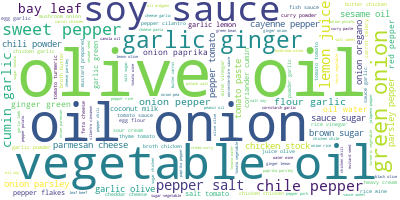

In [28]:
data = pd.read_csv('dataset/recipes/recipes-mallet_new.txt', names=('index', 'cuisine', 'ingredients'), delimiter='|')
ingredients_list = data['ingredients'].tolist()
#  Join the different processed titles together.
long_string = ','.join(list(data['ingredients'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [21]:
# def select_ingredients():
#     file_path = os.path.expanduser('final_data.csv')
#     data = pd.read_csv(file_path, encoding = 'unicode_escape', delimiter = ',')
#     # ingredients_list =  data.dropna(subset=['index'])
#     ingredients_list = data['index'].tolist()
#     ingredients_list= data['index'].fillna('').astype(str)
#     # ingredients_list = index.split(' ')
#     # data['index'] = data.index.to_series().apply(lambda x: index(x))
#     # ingredients_all = data.index.apply(lambda x: treat_ingredients(x))
#     return ingredients_list, data

# ingredients_list,data=select_ingredients()


/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:

# # Remove punctuation
# data['index'] = \
# data['index'].map(lambda x: re.sub('[,\.!?]', '', x))

# # Convert the titles to lowercase
# data['index'] = \
# data['index'].map(lambda x: x.lower())

# # Print out the first rows of papers
# data['index'].head()

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# # Join the different processed titles together.
# long_string = ','.join(list(data['ingredients'].values))

# # Create a WordCloud object
# wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# # Generate a word cloud
# wordcloud.generate(long_string)

# # Visualize the word cloud
# wordcloud.to_image()

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]


# data = data['index'].values.tolist()

# data_words = list(sent_to_words(data))

# # remove stop words
# # data_words = remove_stopwords(data_words)

# print(data_words[:1][0][:30])

['acorn', 'squash']


In [31]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = ingredients_list.values.tolist()

data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['brothchinese', 'oilshrimpsoy', 'oilwater', 'chestnutwine']
/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]
/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:

# number of topics
num_topics = 12

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[(0,
  '0.079*"oil" + 0.036*"chile" + 0.032*"pepper" + 0.022*"sauce" + '
  '0.019*"oilwater" + 0.019*"milk" + 0.018*"or" + 0.014*"peppervegetable" + '
  '0.014*"oilsoy" + 0.013*"bay"'),
 (1,
  '0.025*"baby" + 0.022*"oil" + 0.019*"preparedolive" + 0.017*"winesoy" + '
  '0.016*"bay" + 0.016*"pepper" + 0.016*"juiceolive" + 0.015*"saucesweet" + '
  '0.015*"oilwater" + 0.014*"vinegar"'),
 (2,
  '0.023*"oil" + 0.021*"vinegar" + 0.019*"milk" + 0.017*"oilsoy" + 0.016*"or" '
  '+ 0.013*"oilparmesan" + 0.013*"onion" + 0.009*"pepper" + '
  '0.009*"oilwaterwine" + 0.009*"oilwine"'),
 (3,
  '0.057*"bay" + 0.031*"pepper" + 0.019*"mil

In [34]:
LDAvis_data_filepath = os.path.join('/Users/salvatoreesposito/Documents/Github/DME'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if True:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/Users/salvatoreesposito/Documents/Github/DME'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/anaconda3/envs/dme/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.037151 -0.008539       1        1  12.278657
9      0.079360 -0.068871       2        1  11.954368
7      0.035268  0.062087       3        1  10.116965
3      0.086392 -0.011002       4        1   8.047329
5      0.075893  0.084565       5        1   8.042985
4     -0.019616 -0.096087       6        1   7.951706
6      0.031973 -0.034942       7        1   7.908546
8     -0.119985  0.085280       8        1   7.742959
10     0.035759  0.014807       9        1   7.010647
1     -0.051522  0.042429      10        1   6.482688
2     -0.046745 -0.008114      11        1   6.304819
11    -0.143927 -0.061613      12        1   6.158332, topic_info=             Term        Freq       Total Category  logprob  loglift
102           bay  170.000000  170.000000  Default  30.0000  30.0000
282    juiceolive  116.000000  116.000000  Default  29.0000  29.0000
28            oil  333.000000  333.000000  Default  28.0000  28.0000
8           sauce  237.000000  237.000000  Default  27.0000  27.0000
239       cayenne   66.000000   66.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
15          chile    3.606887  115.131491  Topic12  -5.2639  -0.6759
94        oilrice    2.723917   16.399732  Topic12  -5.5446   0.9922
1834   peppertaco    2.723913   11.653092  Topic12  -5.5446   1.3339
193   winesaltsoy    2.723662   14.813288  Topic12  -5.5447   1.0938
8           sauce    2.723626  237.146879  Topic12  -5.5447  -1.6794

[941 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1275      5  0.725532        african
1275      6  0.241844        african
273       6  0.612869        alfalfa
273      10  0.306434        alfalfa
1939      1  0.833314  allspiceancho
...     ...       ...            ...
133      10  0.255645        winesoy
133      11  0.039330        winesoy
133      12  0.019665        winesoy
1592      6  0.822142      winesugar
279       6  0.614471     wrapsgreen

[2060 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 8, 4, 6, 5, 7, 9, 11, 2, 3, 12])